# Explore here

In [43]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
print(data.dtypes)
data.head(2)

date      object
sales    float64
dtype: object


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211


Step 2: Construct and analyze the time serie

Construct the valid data structure for the time serie, graph it

In [44]:
import datetime
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

new_table = data['sales']
new_table.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

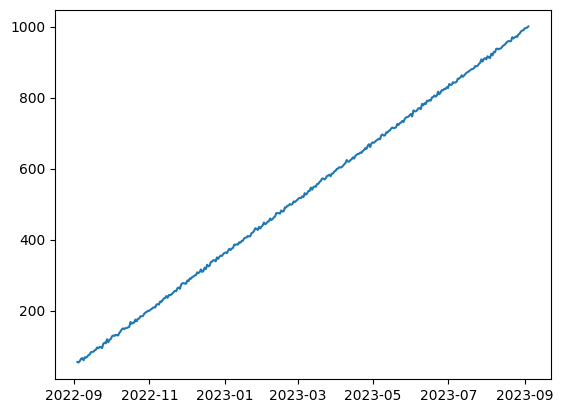

In [45]:
import matplotlib.pyplot as plt
plt.plot(new_table)


Is it stationary?

Is there variability or noise?

TENSOR OF THE TIME SERIES

In [57]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(new_table) 

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

p-value is greater than 0.05, this means that our null hypothesis will be rejected and we will take this series as non-stationary

THE TREND 

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(new_table)
decomposition

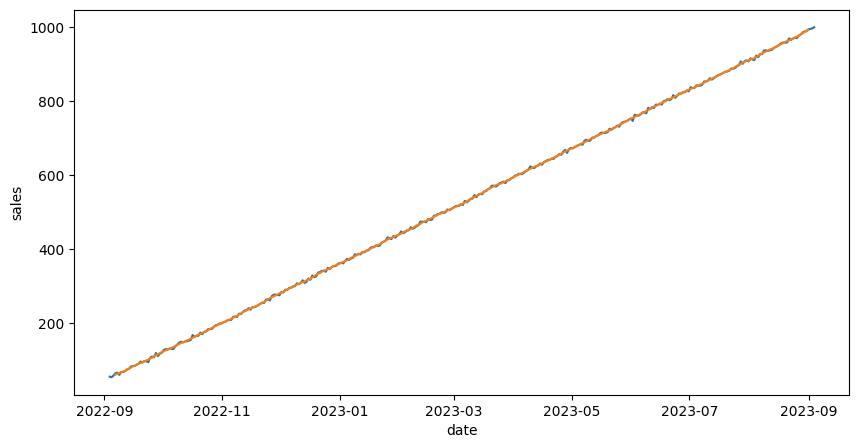

In [50]:
trend = decomposition.trend

import seaborn as sns
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = new_table)
sns.lineplot(data = trend)
plt.show()

there is a tight line along the data implying some trend

ANY SEASONALITY

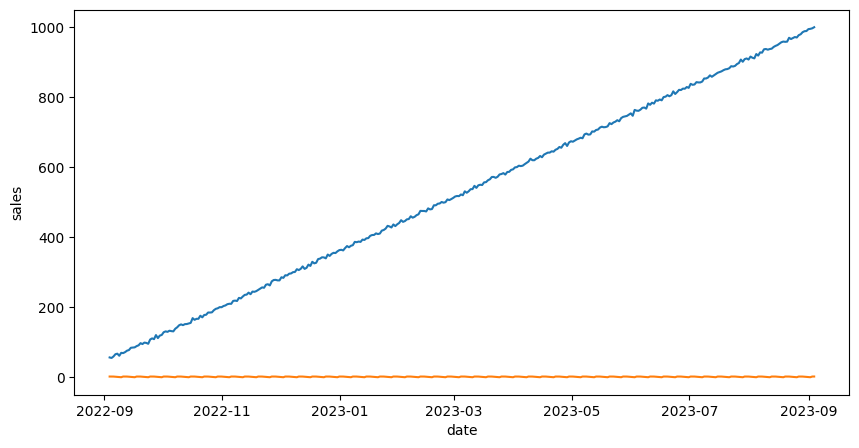

In [52]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = new_table)
sns.lineplot(data = seasonal)
plt.show()

there does not seem to be much seasonality

VARIABILITY

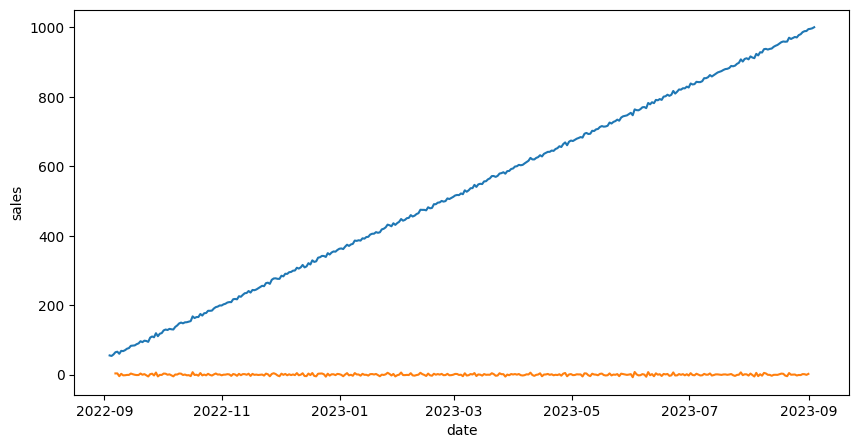

In [53]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = new_table)
sns.lineplot(data = residual)
plt.show()

there is variability as there is an inconsistant pattern in residuals

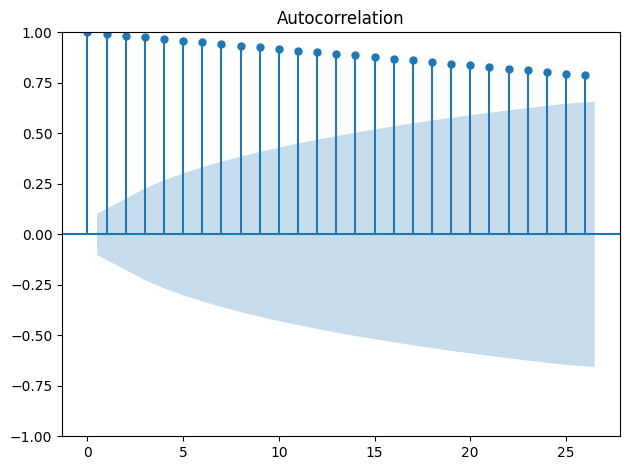

In [54]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(new_table)
plt.tight_layout()
plt.show()

Use the training data to find the best parameterization of your ARIMA model

In [63]:
#in order to optimize its results to the maximum, we must transform the series into stationary
ts_stationary = new_table.diff().dropna()
test_stationarity(ts_stationary)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [64]:
from pmdarima import auto_arima

model = auto_arima(new_table, seasonal = False, trace = True, m = 7)

/home/vscode/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.005 seconds


Now use the trained model with the test set and compare the points with the real ones. Measure the performance of the time serie

In [65]:
forecast = model.predict(20)
forecast

2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831669
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
2023-09-09 17:10:08.079328    1015.217254
2023-09-10 17:10:08.079328    1017.815084
2023-09-11 17:10:08.079328    1020.412915
2023-09-12 17:10:08.079328    1023.010746
2023-09-13 17:10:08.079328    1025.608577
2023-09-14 17:10:08.079328    1028.206409
2023-09-15 17:10:08.079328    1030.804240
2023-09-16 17:10:08.079328    1033.402071
2023-09-17 17:10:08.079328    1035.999902
2023-09-18 17:10:08.079328    1038.597733
2023-09-19 17:10:08.079328    1041.195564
2023-09-20 17:10:08.079328    1043.793395
2023-09-21 17:10:08.079328    1046.391226
2023-09-22 17:10:08.079328    1048.989057
2023-09-23 17:10:08.079328    1051.586888
Freq: D, dtype: float64

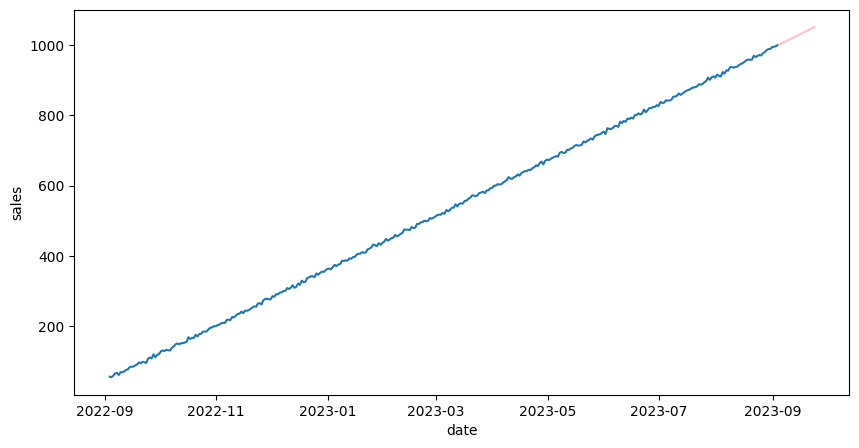

In [66]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = new_table)
sns.lineplot(data = forecast, c = 'pink')
plt.show()